### Imports

In [1]:
import numpy as np
import pandas as pd

import gym
import gym_anytrading
import quantstats as qs

import matplotlib.pyplot as plt

from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv

### Create Env

In [10]:
selection = 1
tickers = ['NESZ', 'CIMB', 'MAY', 'KLK']

df = {}
for ticker in tickers:
    df[ticker] = pd.read_csv('day_data/{} MK Equity.csv'.format(ticker),parse_dates=True, index_col='Dates')

print(len(df))
      
window_size = 10
start_index = window_size
end_index = len(df[tickers[selection]])
pct_train = 0.9
cutoff = int(end_index*0.9)


env_maker_train = lambda: gym.make(
    'daily-v0',
    df = df, 
    window_size = window_size,
    frame_bound = (start_index, cutoff),
    bankroll=100000.
)

env_train = DummyVecEnv([env_maker_train])

env_maker_val = lambda: gym.make(
    'daily-v0',
    df = df,
    window_size = window_size,
    frame_bound = (cutoff+window_size, end_index),
    bankroll=100000.
)

env_val = DummyVecEnv([env_maker_val])

4
NESZ
CIMB
MAY
KLK
Continuous action space
NESZ
CIMB
MAY
KLK
Continuous action space


### Train Env

In [3]:
#policy_kwargs = dict(net_arch=[64, 'lstm', dict(vf=[128, 128, 128], pi=[64, 64])])
model = A2C('MlpPolicy', env_train, verbose=1)# , policy_kwargs=policy_kwargs)
model.learn(total_timesteps=10000)

Using cpu device
-------------------------------------
| time/                 |           |
|    fps                | 2043      |
|    iterations         | 100       |
|    time_elapsed       | 0         |
|    total_timesteps    | 500       |
| train/                |           |
|    entropy_loss       | -7.11     |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 99        |
|    policy_loss        | 4.94e+03  |
|    std                | 1         |
|    value_loss         | 1.6e+06   |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 2269      |
|    iterations         | 200       |
|    time_elapsed       | 0         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -7.11     |
|    explained_variance | 5.96e-08  |
|    learning_rate      | 0.0007    |
|    n_updates          | 199    

### Test Env

In [16]:
env = env_maker_train() #env_maker_val()
observation = env.reset()
print(observation[np.newaxis, ...])

c = 0
while True:
    c+=1
    #observation = observation[np.newaxis, ...]

    # action = env.action_space.sample()
    action, _states = model.predict(observation)
   
    print(action)
    observation, reward, done, info = env.step(action)

    #env.render()
    if done:
        print("info:", info)
        print("iterations", c)
        break

NESZ
CIMB
MAY
KLK
Continuous action space
[[[[ 1.700e+01  0.000e+00]
   [ 2.373e+00  0.000e+00]
   [ 6.658e+00  0.000e+00]
   [ 3.500e+00  0.000e+00]]

  [[ 1.700e+01  0.000e+00]
   [ 2.360e+00 -1.300e-02]
   [ 6.706e+00  4.800e-02]
   [ 3.533e+00  3.300e-02]]

  [[ 1.690e+01 -1.000e-01]
   [ 2.348e+00 -1.200e-02]
   [ 6.658e+00 -4.800e-02]
   [ 3.500e+00 -3.300e-02]]

  [[ 1.680e+01 -1.000e-01]
   [ 2.323e+00 -2.500e-02]
   [ 6.610e+00 -4.800e-02]
   [ 3.467e+00 -3.300e-02]]

  [[ 1.680e+01  0.000e+00]
   [ 2.323e+00  0.000e+00]
   [ 6.610e+00  0.000e+00]
   [ 3.467e+00  0.000e+00]]

  [[ 1.680e+01  0.000e+00]
   [ 2.323e+00  0.000e+00]
   [ 6.610e+00  0.000e+00]
   [ 3.467e+00  0.000e+00]]

  [[ 1.690e+01  1.000e-01]
   [ 2.434e+00  1.110e-01]
   [ 6.801e+00  1.910e-01]
   [ 3.433e+00 -3.400e-02]]

  [[ 1.690e+01  0.000e+00]
   [ 2.694e+00  2.600e-01]
   [ 7.089e+00  2.880e-01]
   [ 3.333e+00 -1.000e-01]]

  [[ 1.690e+01  0.000e+00]
   [ 2.694e+00  0.000e+00]
   [ 7.568e+00  4.790e-0

### Plot Results

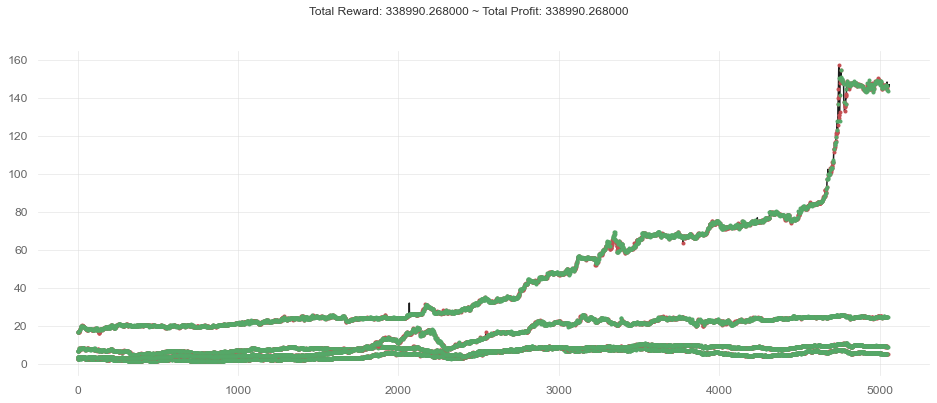

In [17]:
plt.figure(figsize=(16, 6))
env.render_all()
plt.show()

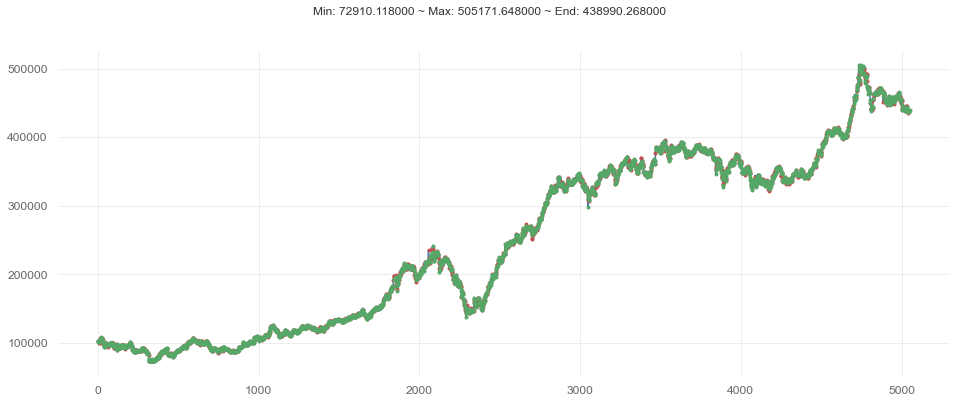

In [18]:
plt.figure(figsize=(16, 6))
env.render_net_worth()
plt.show()

In [7]:
print(np.array(env.history['position'])[:,0].mean())
print(np.array(env.history['net_worth']).mean())
#np.array(env.history['position'])[:,0].min()

1808.185563012621
123897.94246661848


### Custom Model

In [13]:
class CustomModel:
    # Buy and Hold
    def __init__(self, env, strategy='buy and hold'):
        self.env = env        
        strategies = ['buy and hold', 'overnight', 'intraday', 'random walk']
        self.strategy = strategies.index(strategy)
    def learn(self, total_timesteps=1000):
        pass
    def predict(self, observation):
        if self.strategy == 0:
            return np.array([0,1,1,1,1]), None
        elif self.strategy == 1:
            pass 
        elif self.strategy == 2:
            pass
        elif self.strategy == 3:
            pass
    

model = CustomModel(env)

### Analysis Using `quantstats`

                           Strategy
-------------------------  ----------
Start Period               2000-01-19
End Period                 2019-05-28
Risk-Free Rate             0.0%
Time in Market             94.0%

Cumulative Return          328.88%
CAGR﹪                     7.81%

Sharpe                     0.6
Smart Sharpe               0.57
Sortino                    0.86
Smart Sortino              0.83
Sortino/√2                 0.61
Smart Sortino/√2           0.58
Omega                      1.12

Max Drawdown               -42.62%
Longest DD Days            1400
Volatility (ann.)          13.69%
Calmar                     0.18
Skew                       -0.14
Kurtosis                   8.04

Expected Daily %           0.03%
Expected Monthly %         0.63%
Expected Yearly %          7.55%
Kelly Criterion            5.55%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.39%
Expected Shortfall (cVaR)  -1.39%

Gain/Pain Ratio            0.12
Gain/Pain (1M)             0

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2008-01-15,2008-10-29,2009-10-05,629,-42.620387,-40.545264
2,2000-02-15,2001-04-10,2003-10-29,1352,-32.597400,-31.866041
3,2013-07-25,2016-01-21,2017-05-25,1400,-18.711443,-17.377912
4,2011-07-11,2011-09-26,2012-01-05,178,-14.004879,-11.376048
5,2004-03-22,2004-05-17,2005-01-11,295,-13.899415,-12.575327


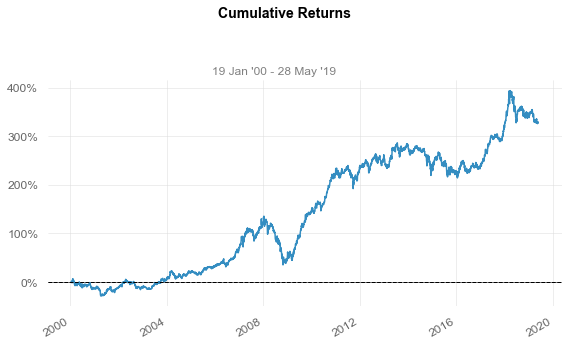

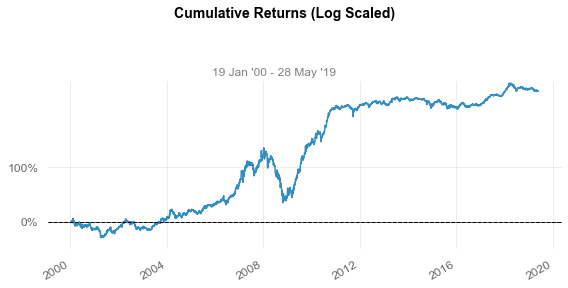

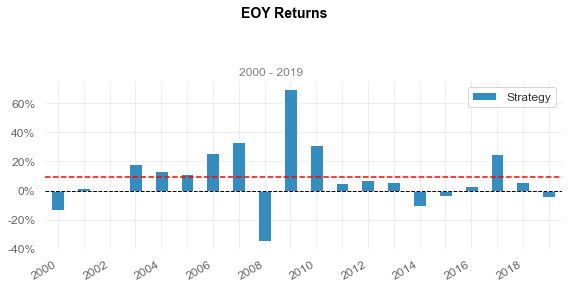

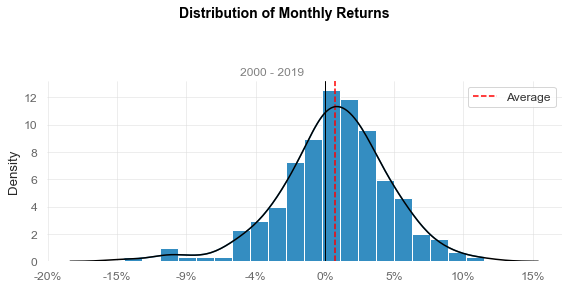

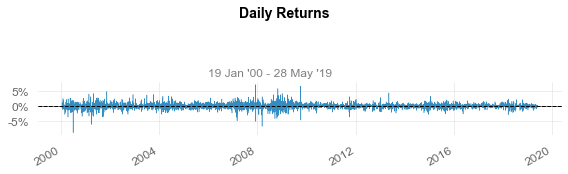

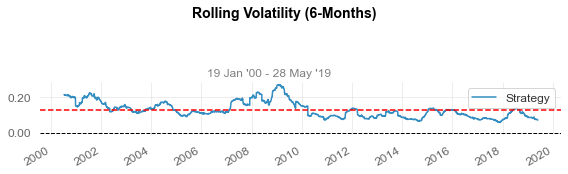

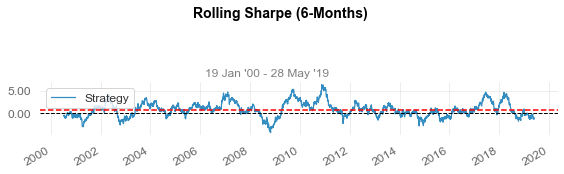

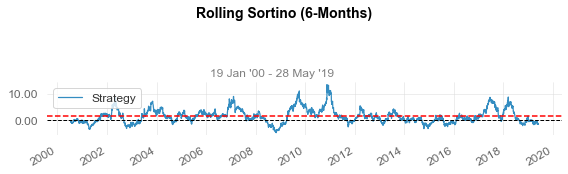

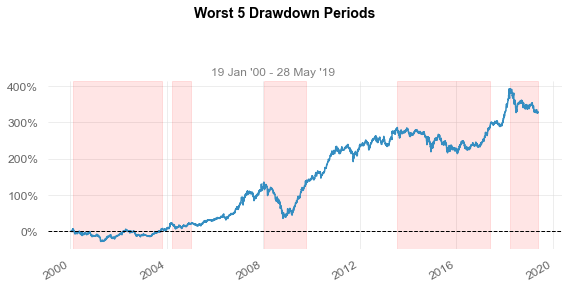

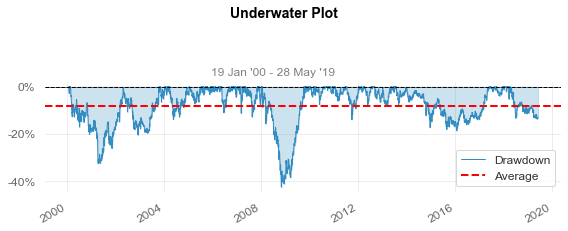

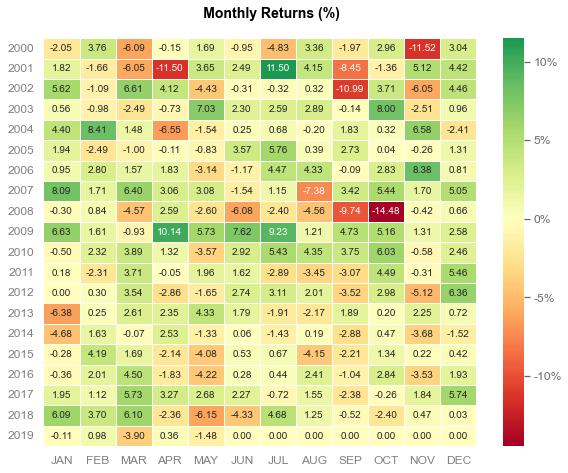

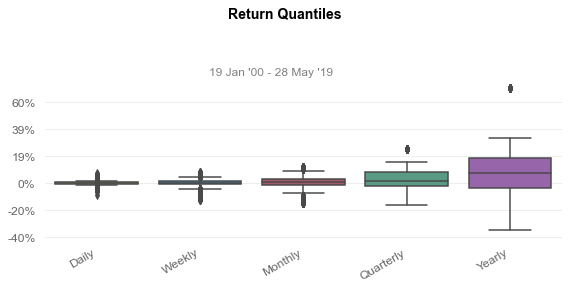

In [20]:
qs.extend_pandas()

net_worth = pd.Series(np.array(env.history['net_worth']), index=df['NESZ'].index[start_index+1:cutoff] )#df['CIMB'].index[start_index+1:end_index])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output=True, download_filename='present_quantstats.html')